Com os dados que temos, tentaremos criar um modelo que prediz se um paciente contém uma doença ou não.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    

Definiremos aqui nossos dados

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1>Conteúdo dos Dados</h1>
<p>
age - age in years 

sex - (1 = male; 0 = female) 

cp - chest pain type 

trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

chol - serum cholestoral in mg/dl 

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg - resting electrocardiographic results 

thalach - maximum heart rate achieved 

exang - exercise induced angina (1 = yes; 0 = no) 

oldpeak - ST depression induced by exercise relative to rest 

slope - the slope of the peak exercise ST segment 

ca - number of major vessels (0-3) colored by flourosopy 

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

target - have disease or not (1=yes, 0=no)
</p>

<h1>Explorando os Dados</h1>

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

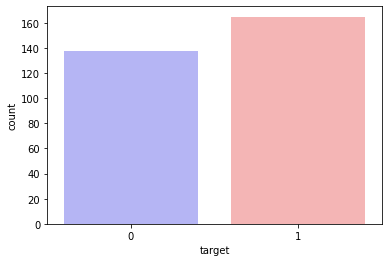

In [7]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [10]:
countNoDisease = len(df[df.target ==0])
countHaveDisease = len(df[df.target ==1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


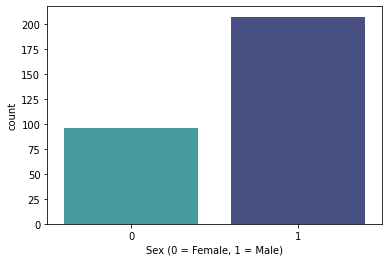

In [12]:
sns.countplot(x='sex',data=df,palette="mako_r")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()

In [13]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


Aqui, agruparemos os grupos com e sem doença baseado na média

In [14]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212
